# Final Project Submission

Please fill out:
* Student name: Martin Kithome
* Student pace: part time
* Scheduled project review date/time: 
* Instructor name: 
* Blog post URL:


# PROJECT

For this project, I will be  using exploratory data analysis to generate insights for a business stakeholder.


# Introduction:

Microsoft sees all the big companies creating original video content and they want to get in on the fun. They have decided to create a new movie studio, but they don’t know anything about creating movies. From the zipped data, I shall be using these three data sets to visualize,analyze,give a recommendation and make a conclusion on behalf of the  stakeholder.


1.imdb.title.basics
2.imdb.title.ratings
3.bom.movie_gross

# Objectives:

1.Identify the most frequent genres in the dataset.

2.Investigate the most rated and voted genres.

3.Identify general trends of revenue generation over years.

4.Discover top competitors in the market.

In [106]:
# Your code here - remember to use markdown cells for comments as well!
import pandas as pd
import numpy as np
import csv
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [107]:
#import title.basics
basics_df = pd.read_csv('title.basics.csv')
basics_df.head()

,tconst,primary_title,original_title,start_year,runtime_minutes,genres
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama"
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama"
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama"
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy"


In [9]:
# import title.ratings
ratings_df = pd.read_csv('title.ratings.csv')
ratings_df.head()

,tconst,averagerating,numvotes
0,tt10356526,8.3,31
1,tt10384606,8.9,559
2,tt1042974,6.4,20
3,tt1043726,4.2,50352
4,tt1060240,6.5,21


In [10]:
#import movie_gross
gross_df = pd.read_csv('bom.movie_gross.csv')
gross_df.head()

,title,studio,domestic_gross,foreign_gross,year
0,Toy Story 3,BV,415000000.0,652000000,2010
1,Alice in Wonderland (2010),BV,334200000.0,691300000,2010
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000,2010
3,Inception,WB,292600000.0,535700000,2010
4,Shrek Forever After,P/DW,238700000.0,513900000,2010


In [15]:
# Joining title.ratings and title.basics datasets on the "tconst" column
ratings_basics_df = pd.merge(ratings_df, basics_df, on='tconst')
ratings_basics_df.head()

,tconst,averagerating,numvotes,primary_title,original_title,start_year,runtime_minutes,genres
0,tt10356526,8.3,31,Laiye Je Yaarian,Laiye Je Yaarian,2019,117.0,Romance
1,tt10384606,8.9,559,Borderless,Borderless,2019,87.0,Documentary
2,tt1042974,6.4,20,Just Inès,Just Inès,2010,90.0,Drama
3,tt1043726,4.2,50352,The Legend of Hercules,The Legend of Hercules,2014,99.0,"Action,Adventure,Fantasy"
4,tt1060240,6.5,21,Até Onde?,Até Onde?,2011,73.0,"Mystery,Thriller"


In [12]:
# Join the resulting dataset with the bom.movie_gross.csv dataset on the "title" column
df = pd.merge(ratings_basics_df, gross_df, left_on='primary_title', right_on='title')
df.head()

,tconst,averagerating,numvotes,primary_title,original_title,start_year,runtime_minutes,genres,title,studio,domestic_gross,foreign_gross,year
0,tt1043726,4.2,50352,The Legend of Hercules,The Legend of Hercules,2014,99.0,"Action,Adventure,Fantasy",The Legend of Hercules,LG/S,18800000.0,42400000,2014
1,tt1171222,5.1,8296,Baggage Claim,Baggage Claim,2013,96.0,Comedy,Baggage Claim,FoxS,21600000.0,887000,2013
2,tt1181840,7.0,5494,Jack and the Cuckoo-Clock Heart,Jack et la mécanique du coeur,2013,94.0,"Adventure,Animation,Drama",Jack and the Cuckoo-Clock Heart,Shout!,NaN,3400000,2014
3,tt1210166,7.6,326657,Moneyball,Moneyball,2011,133.0,"Biography,Drama,Sport",Moneyball,Sony,75600000.0,34600000,2011
4,tt1212419,6.5,87288,Hereafter,Hereafter,2010,129.0,"Drama,Fantasy,Romance",Hereafter,WB,32700000.0,72500000,2010


In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3027 entries, 0 to 3026
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   tconst           3027 non-null   object 
 1   averagerating    3027 non-null   float64
 2   numvotes         3027 non-null   int64  
 3   primary_title    3027 non-null   object 
 4   original_title   3027 non-null   object 
 5   start_year       3027 non-null   int64  
 6   runtime_minutes  2980 non-null   float64
 7   genres           3020 non-null   object 
 8   title            3027 non-null   object 
 9   studio           3024 non-null   object 
 10  domestic_gross   3005 non-null   float64
 11  foreign_gross    1832 non-null   object 
 12  year             3027 non-null   int64  
dtypes: float64(3), int64(3), object(7)
memory usage: 331.1+ KB


# Data Cleaning:

Cleaning, scrubbing and handling missing values.
Dropping duplicated columns and handling missing values.

In [18]:
# dropping duplicated columns
df.drop(columns = ['original_title', 'title','year','tconst'], axis = 1, inplace=True)

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3027 entries, 0 to 3026
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   averagerating    3027 non-null   float64
 1   numvotes         3027 non-null   int64  
 2   primary_title    3027 non-null   object 
 3   start_year       3027 non-null   int64  
 4   runtime_minutes  2980 non-null   float64
 5   genres           3020 non-null   object 
 6   studio           3024 non-null   object 
 7   domestic_gross   3005 non-null   float64
 8   foreign_gross    1832 non-null   object 
dtypes: float64(3), int64(2), object(4)
memory usage: 236.5+ KB


# Missing Values:

For the null values, we can either drop them or impute them with mean, median, or using special identifiers.

In [20]:
# checking for missing values. 
df.isna().sum()

averagerating         0
numvotes              0
primary_title         0
start_year            0
runtime_minutes      47
genres                7
studio                3
domestic_gross       22
foreign_gross      1195
dtype: int64

In [22]:
def missing_values(data):
     # identify the total missing values per column
    miss = data.isnull().sum().sort_values(ascending = False)
     # calculate percentage of the missing values
    percentage_miss = (data.isnull().sum() / len(data)).sort_values(ascending = False)
    # store in a dataframe 
    missing = pd.DataFrame({"Missing Values": miss, "Percentage(%)": percentage_miss})
     # remove values that are missing 
    missing.drop(missing[missing["Percentage(%)"] == 0].index, inplace = True)

    return missing


missing_data = missing_values(df)
missing_data

,Missing Values,Percentage(%)
foreign_gross,1195,0.394780
runtime_minutes,47,0.015527
domestic_gross,22,0.007268
genres,7,0.002313
studio,3,0.000991


Based on the output, the variables "genre," "studio," and "runtime in minutes" have very few missing values, and removing them from the dataset is unlikely to significantly impact our model's performance. Filling in these missing values may not be the most appropriate approach, as each movie typically has a unique title and runtime.

On the other hand, the "domestic gross" and "foreign gross" columns are highly dependent on the studio to which a movie belongs. Certain studios may have a substantial impact on the gross revenue, both domestically and internationally, compared to others. Therefore, removing the missing values in these columns is a reasonable approach to avoid introducing bias into our analysis. By doing so, we ensure that the revenue estimates are not influenced by inaccurate or imputed values, which could lead to skewed results.

Overall, the decision to drop the missing values for the "domestic gross" and "foreign gross" columns is justifiable, as it helps maintain the integrity of the data and avoids potential bias in the analysis.

In [25]:
#dropping rows with null values
df.dropna(axis=0, inplace=True)

In [26]:
df.isna().sum()

averagerating      0
numvotes           0
primary_title      0
start_year         0
runtime_minutes    0
genres             0
studio             0
domestic_gross     0
foreign_gross      0
dtype: int64

In [27]:
# foreign_gross to float
df["foreign_gross"] = df["foreign_gross"].str.replace(',' ,'').astype(float)
df["foreign_gross"].head()

0     42400000.0
1       887000.0
3     34600000.0
4     72500000.0
5    485300000.0
Name: foreign_gross, dtype: float64

In [28]:
df.head()

,averagerating,numvotes,primary_title,start_year,runtime_minutes,genres,studio,domestic_gross,foreign_gross
0,4.2,50352,The Legend of Hercules,2014,99.0,"Action,Adventure,Fantasy",LG/S,18800000.0,42400000.0
1,5.1,8296,Baggage Claim,2013,96.0,Comedy,FoxS,21600000.0,887000.0
3,7.6,326657,Moneyball,2011,133.0,"Biography,Drama,Sport",Sony,75600000.0,34600000.0
4,6.5,87288,Hereafter,2010,129.0,"Drama,Fantasy,Romance",WB,32700000.0,72500000.0
5,7.4,428142,Mission: Impossible - Ghost Protocol,2011,132.0,"Action,Adventure,Thriller",Par.,209400000.0,485300000.0


In [29]:
df['genre']=df['genres'].str.split(",", expand= True)[0]
df['genre'][0]

'Action'

In [30]:
df.head()

,averagerating,numvotes,primary_title,start_year,runtime_minutes,genres,studio,domestic_gross,foreign_gross,genre
0,4.2,50352,The Legend of Hercules,2014,99.0,"Action,Adventure,Fantasy",LG/S,18800000.0,42400000.0,Action
1,5.1,8296,Baggage Claim,2013,96.0,Comedy,FoxS,21600000.0,887000.0,Comedy
3,7.6,326657,Moneyball,2011,133.0,"Biography,Drama,Sport",Sony,75600000.0,34600000.0,Biography
4,6.5,87288,Hereafter,2010,129.0,"Drama,Fantasy,Romance",WB,32700000.0,72500000.0,Drama
5,7.4,428142,Mission: Impossible - Ghost Protocol,2011,132.0,"Action,Adventure,Thriller",Par.,209400000.0,485300000.0,Action


In [31]:
df.drop(columns = ['genres'], axis=1, inplace = True)

In [32]:
df.head()

,averagerating,numvotes,primary_title,start_year,runtime_minutes,studio,domestic_gross,foreign_gross,genre
0,4.2,50352,The Legend of Hercules,2014,99.0,LG/S,18800000.0,42400000.0,Action
1,5.1,8296,Baggage Claim,2013,96.0,FoxS,21600000.0,887000.0,Comedy
3,7.6,326657,Moneyball,2011,133.0,Sony,75600000.0,34600000.0,Biography
4,6.5,87288,Hereafter,2010,129.0,WB,32700000.0,72500000.0,Drama
5,7.4,428142,Mission: Impossible - Ghost Protocol,2011,132.0,Par.,209400000.0,485300000.0,Action


In [33]:
#overal dataset

df.describe()

,averagerating,numvotes,start_year,runtime_minutes,domestic_gross,foreign_gross
count,1767.000000,1.767000e+03,1767.000000,1767.000000,1.767000e+03,1.767000e+03
mean,6.459706,9.692010e+04,2013.559706,107.895869,5.008103e+07,7.959582e+07
std,0.991033,1.539057e+05,2.621180,20.105904,8.101089e+07,1.403646e+08
min,1.600000,5.000000e+00,2010.000000,3.000000,4.000000e+02,6.000000e+02
25%,5.900000,6.392500e+03,2011.000000,95.000000,1.300000e+06,4.900000e+06
50%,6.500000,3.987000e+04,2013.000000,106.000000,2.110000e+07,2.150000e+07
75%,7.100000,1.171330e+05,2016.000000,119.000000,6.120000e+07,8.195000e+07
max,9.200000,1.841066e+06,2019.000000,272.000000,7.001000e+08,9.464000e+08


# Data Visualization


Visualizing the dataset

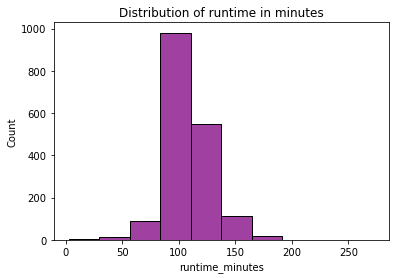

In [44]:
ax = sns.histplot(data=df, x="runtime_minutes", bins=10, color='purple')

# Set the title for the plot
ax.set_title('Distribution of runtime in minutes')

# Show the plot
plt.show()


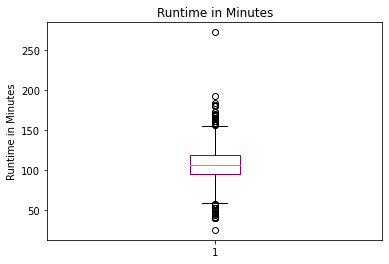

In [65]:

# Select the data to be plotted
data = df['runtime_minutes']

# Plot the box plot with the desired color
plt.boxplot(data, boxprops={'color': 'purple'})

# Add a title to the plot
plt.title('Runtime in Minutes')

# Add a label to the y-axis
plt.ylabel('Runtime in Minutes')

# Show the plot
plt.show()

In [51]:
#identifying the movie with less that 5 minutes runtime
data=df[df['runtime_minutes']<=25]
print(data)

      averagerating  numvotes primary_title  start_year  runtime_minutes  \
482             6.7        10     Limitless        2015              3.0   
1052            7.9        12      The Call        2013             25.0   

     studio  domestic_gross  foreign_gross        genre  
482   Rela.      79200000.0     82600000.0    Biography  
1052   TriS      51900000.0     16700000.0  Documentary  


In [52]:
df.duplicated().sum()

0

In [53]:
df = df.drop(df[df['runtime_minutes'] == 3].index)
df.head()

,averagerating,numvotes,primary_title,start_year,runtime_minutes,studio,domestic_gross,foreign_gross,genre
0,4.2,50352,The Legend of Hercules,2014,99.0,LG/S,18800000.0,42400000.0,Action
1,5.1,8296,Baggage Claim,2013,96.0,FoxS,21600000.0,887000.0,Comedy
3,7.6,326657,Moneyball,2011,133.0,Sony,75600000.0,34600000.0,Biography
4,6.5,87288,Hereafter,2010,129.0,WB,32700000.0,72500000.0,Drama
5,7.4,428142,Mission: Impossible - Ghost Protocol,2011,132.0,Par.,209400000.0,485300000.0,Action


In [54]:
#checking the presence of the outlier
data=df[df['runtime_minutes']<=25]
print(data)

      averagerating  numvotes primary_title  start_year  runtime_minutes  \
1052            7.9        12      The Call        2013             25.0   

     studio  domestic_gross  foreign_gross        genre  
1052   TriS      51900000.0     16700000.0  Documentary  


NOTE:From this histogram, the average runtime for a movie is 107.895 minutes which is slightly differnt from the mean runtime, however this does not cause big significance difference hence explaining its normal distribution.

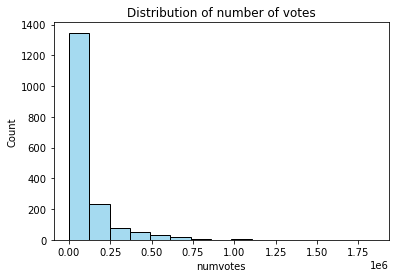

In [61]:
# Create the histogram 
ax = sns.histplot(data=df, x="numvotes", bins=15, color='skyblue')

# Set the title for the plot
ax.set_title('Distribution of number of votes')

# Show the plot
plt.show()

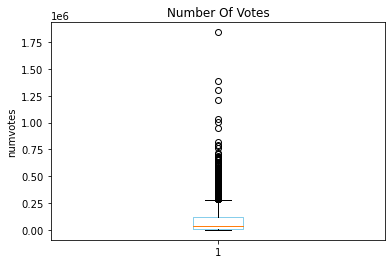

In [88]:
# Select the data to be plotted
data = df['numvotes']

# Plot the box plot with the desired color
plt.boxplot(data, boxprops={'color': 'skyblue'})

# Add a title to the plot
plt.title('Number Of Votes')

# Add a label to the y-axis
plt.ylabel('numvotes')

# Show the plot
plt.show()

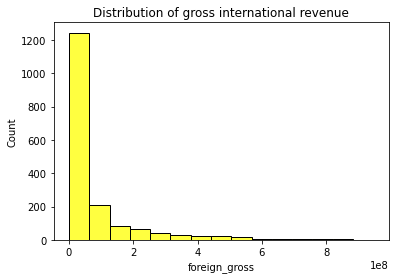

In [89]:
# Create the histogram 
ax = sns.histplot(data=df, x="foreign_gross", bins=15, color='yellow')

# Set the title for the plot
ax.set_title('Distribution of gross international revenue')

# Show the plot
plt.show()

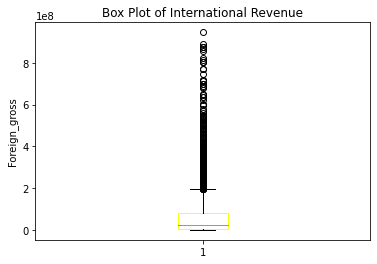

In [67]:
# Select the data to be plotted
data = df['foreign_gross']

# Plot the box plot
plt.boxplot(data, boxprops={'color': 'yellow'})

# Add a title to the plot
plt.title('Box Plot of International Revenue')

# Add a label to the y-axis
plt.ylabel('Foreign_gross')

# Show the plot
plt.show()

# Data Analysis

conducting EDA on the dataset
visualizing the data to identify trends.
Exploring the type of genre.

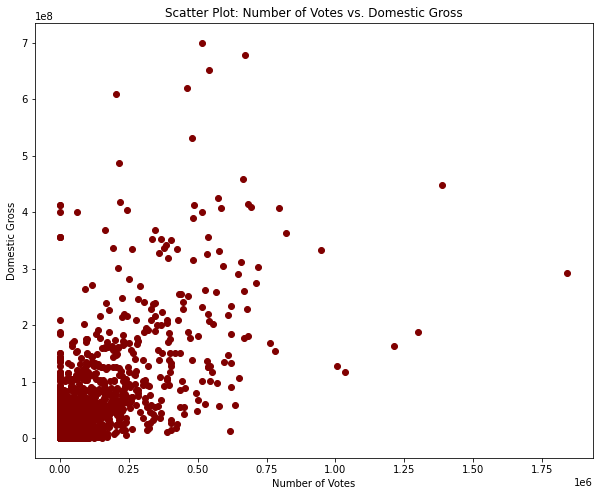

In [93]:

#Finding the correlation between numvotes and domestic gross

# Define fData as the DataFrame containing the relevant columns
fData = df[['numvotes', 'domestic_gross']]

# Extract the 'numvotes' and 'domestic_gross' columns for the scatter plot
x = fData['numvotes']
y = fData['domestic_gross']

# Create a scatter plot with the desired color (blue)
fig, ax = plt.subplots(figsize=(10, 8))
ax.scatter(x, y, c="maroon")

# Add labels to the x and y axes
ax.set_xlabel('Number of Votes')
ax.set_ylabel('Domestic Gross')

# Add a title to the plot
ax.set_title('Scatter Plot: Number of Votes vs. Domestic Gross')

# Show the plot
plt.show()

A correlaton bellow 0.5 indicates weak correlation, which means a movie could run for over 2 hours and still be rated highly, or have a runtime of below 70 minutes and still be rated highly. From the previous visualizations, remarkable rating could result from the type of genre and also the studio type.

In [104]:
#correlation
df['runtime_minutes'].corr(df['numvotes'])

0.33379995293842174

In [105]:
#correlation
df['runtime_minutes'].corr(df['averagerating'])

0.2500941557703461

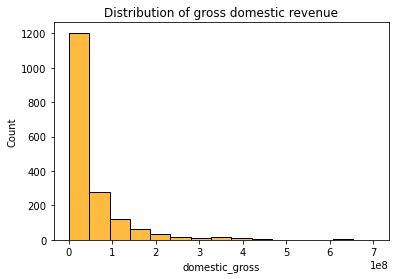

In [69]:
# Create the histogram with the desired color (burgundy)
ax = sns.histplot(data=df, x="domestic_gross", bins=15, color='orange')

# Set the title for the plot
ax.set_title('Distribution of gross domestic revenue')

# Show the plot
plt.show()

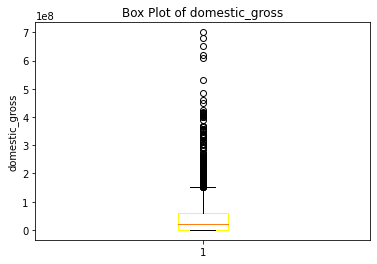

In [70]:
# Select the data to be plotted
data = df['domestic_gross']

# Plot the box plot
plt.boxplot(data, boxprops={'color': 'yellow'})

# Add a title to the plot
plt.title('Box Plot of domestic_gross')

# Add a label to the y-axis
plt.ylabel('domestic_gross')

# Show the plot
plt.show()

The above plots violates the normal distribution, and this explains the difference in their mean and median values.


In [72]:
# Calculating the value counts for each genre in ascending order
df['genre'].value_counts(ascending=False)

Action         458
Drama          360
Comedy         359
Adventure      173
Biography      137
Crime           80
Horror          76
Documentary     65
Animation       22
Thriller        11
Fantasy          9
Mystery          7
Romance          4
Family           3
Music            1
Sci-Fi           1
Name: genre, dtype: int64

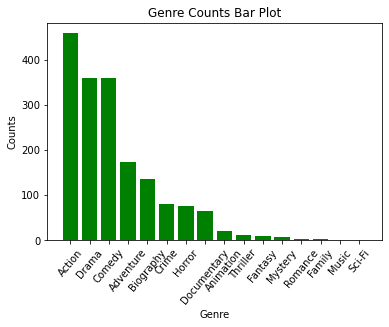

In [74]:
# Calculate value counts for each genre
genre_counts = df['genre'].value_counts(ascending=False)

# Plot the bar plot with the desired color (green)
plt.bar(genre_counts.index, genre_counts.values, color='green')

# Add labels to the x and y axes
plt.xlabel('Genre')
plt.ylabel('Counts')

# Add a title to the plot
plt.title('Genre Counts Bar Plot')

# Rotate x-axis labels for better readability
plt.xticks(rotation=50)

# Show the plot
plt.show()


Action,Drama,Adventure,Comedy movies are the most frequent in the dataset.

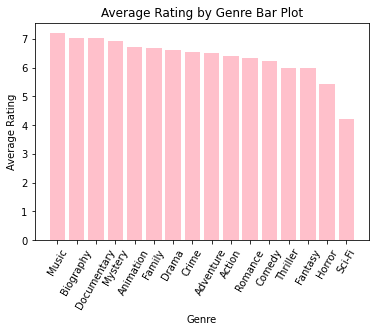

In [86]:
# Calculate the average rating for each genre
genre_ratings = df.groupby('genre')['averagerating'].mean()

# Sort the genre ratings in descending order
genre_ratings = genre_ratings.sort_values(ascending=False)

# Plot the bar plot with the desired color (pink)
plt.bar(genre_ratings.index, genre_ratings.values, color='pink')

# Add labels to the x and y axes
plt.xlabel('Genre')
plt.ylabel('Average Rating')

# Add a title to the plot
plt.title('Average Rating by Genre Bar Plot')

# Rotate x-axis labels for better readability
plt.xticks(rotation=60)

# Show the plot
plt.show()

Music,Biography,Documentary,Mystery and Animation are the most rated genres

Checking for most voted genres


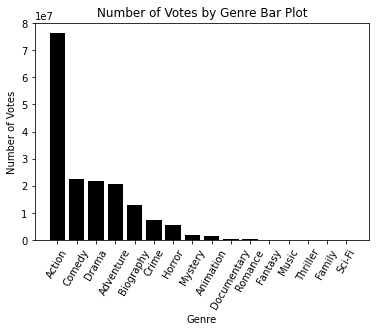

In [85]:
# Calculate the number of votes for each genre
genre_votes = df.groupby('genre')['numvotes'].sum()

# Sort the genre votes in descending order
genre_votes = genre_votes.sort_values(ascending=False)

# Plot the bar plot with the desired color (black)
plt.bar(genre_votes.index, genre_votes.values, color='black')

# Add labels to the x and y axes
plt.xlabel('Genre')
plt.ylabel('Number of Votes')

# Add a title to the plot
plt.title('Number of Votes by Genre Bar Plot')

# Rotate x-axis labels for better readability
plt.xticks(rotation=60)

# Show the plot
plt.show()

Action, Comedy, drama and Adventure are the leading genres.

Checking for popular movies.

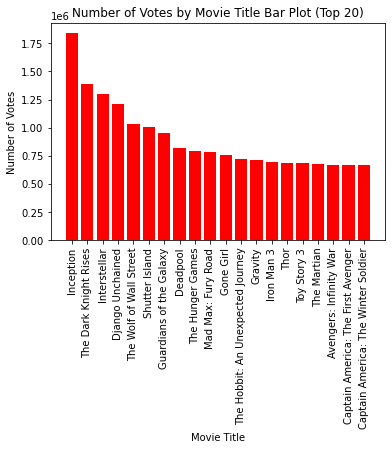

In [83]:
# Calculate the number of votes for each movie title
title_votes = df.groupby('primary_title')['numvotes'].sum()

# Sort the title votes in descending order
title_votes = title_votes.sort_values(ascending=False)

# Plot the bar plot for the first 20 titles with the desired color (red)
plt.bar(title_votes.index[:20], title_votes.values[:20], color='red')

# Add labels to the x and y axes
plt.xlabel('Movie Title')
plt.ylabel('Number of Votes')

# Add a title to the plot
plt.title('Number of Votes by Movie Title Bar Plot (Top 20)')

# Rotate the x-axis labels to prevent them from overlapping
plt.xticks(rotation=90)

# Show the plot
plt.show()

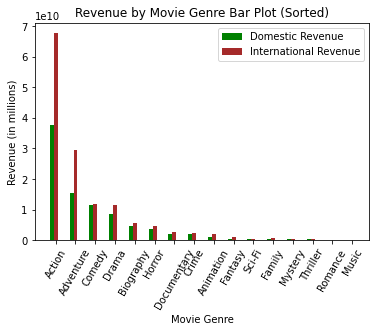

In [94]:
# Calculate the domestic and international revenue for each genre
genre_revenue = df.groupby('genre')[['domestic_gross', 'foreign_gross']].sum()

# Sort the genre revenue in descending order
genre_revenue = genre_revenue.sort_values(by=['domestic_gross', 'foreign_gross'], ascending=False)

# Set the x-axis as the genre names
x = np.arange(len(genre_revenue.index))

# Plot the bar plot for the domestic and international revenue with desired colors (green and brown)
plt.bar(x - 0.2, genre_revenue['domestic_gross'], 0.2, label='Domestic Revenue', color='green')
plt.bar(x, genre_revenue['foreign_gross'], 0.2, label='International Revenue', color='brown')

# Add labels to the x and y axes
plt.xlabel('Movie Genre')
plt.ylabel('Revenue (in millions)')

# Add a title to the plot
plt.title('Revenue by Movie Genre Bar Plot (Sorted)')

# Add the genre names as x-axis labels
plt.xticks(x, genre_revenue.index)

# Add a legend to the plot
plt.legend()

# Rotate the x-axis labels to prevent them from overlapping
plt.xticks(rotation=60)

# Show the plot
plt.show()

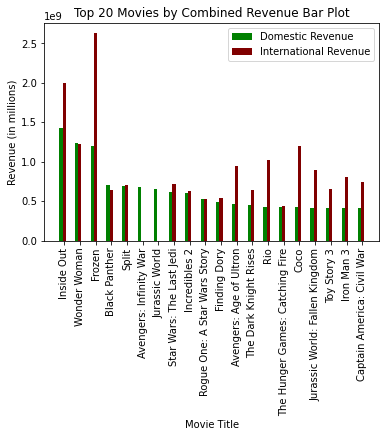

In [97]:
# Calculate the combined domestic and international revenue for each title
title_revenue = df.groupby('primary_title')[['domestic_gross', 'foreign_gross']].sum()

# Sort the title revenue in descending order
title_revenue = title_revenue.sort_values(by=['domestic_gross', 'foreign_gross'], ascending=False)

# Take the first 20 rows of the title revenue
title_revenue = title_revenue.iloc[:20,:]

# Set the x-axis as the title names
x = np.arange(len(title_revenue.index))

# Plot the bar plot for the domestic and international revenue with desired colors (green and maroon)
plt.bar(x - 0.2, title_revenue['domestic_gross'], 0.2, label='Domestic Revenue', color='green')
plt.bar(x, title_revenue['foreign_gross'], 0.2, label='International Revenue', color='maroon')

# Add labels to the x and y axes
plt.xlabel('Movie Title')
plt.ylabel('Revenue (in millions)')

# Add a title to the plot
plt.title('Top 20 Movies by Combined Revenue Bar Plot')

# Add the title names as x-axis labels
plt.xticks(x, title_revenue.index, rotation=90)

# Add a legend to the plot
plt.legend()

# Show the plot
plt.show()


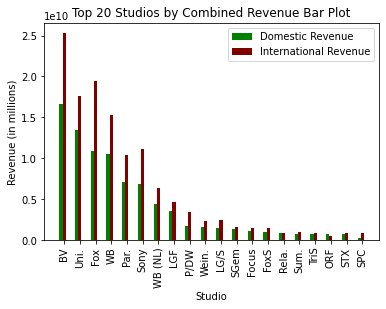

In [99]:
# Calculate the combined domestic and international revenue for each studio
studio_revenue = df.groupby('studio')[['domestic_gross', 'foreign_gross']].sum()

# Sort the studio revenue in descending order
studio_revenue = studio_revenue.sort_values(by=['domestic_gross', 'foreign_gross'], ascending=False)

# Take the first 20 rows of the studio revenue
studio_revenue = studio_revenue.iloc[:20, :]

# Set the x-axis as the studio names
x = np.arange(len(studio_revenue.index))

# Plot the bar plot for the domestic and international revenue with desired colors (green and maroon)
plt.bar(x - 0.2, studio_revenue['domestic_gross'], 0.2, label='Domestic Revenue', color='green')
plt.bar(x, studio_revenue['foreign_gross'], 0.2, label='International Revenue', color='maroon')

# Add labels to the x and y axes
plt.xlabel('Studio')
plt.ylabel('Revenue (in millions)')

# Add a title to the plot
plt.title('Top 20 Studios by Combined Revenue Bar Plot')

# Add the studio names as x-axis labels
plt.xticks(x, studio_revenue.index, rotation=90)

# Add a legend to the plot
plt.legend()

# Show the plot
plt.show()

The first 20 studios have the most rated movie.
With most of them generating more revenue on international markets as compared to domestic.

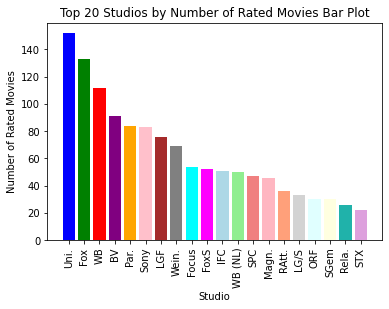

In [101]:
# Calculate the number of rated movies for each studio
studio_ratings = df['studio'].value_counts()

# Sort the studio ratings in descending order
studio_ratings = studio_ratings.sort_values(ascending=False)

# Take the first 20 rows of the studio ratings
studio_ratings = studio_ratings.iloc[:20]

# Set the x-axis as the studio names
x = np.arange(len(studio_ratings.index))

# Define a list of colors for each bar in the bar plot
colors = ['blue', 'green', 'red', 'purple', 'orange', 'pink', 'brown', 'gray', 'cyan', 'magenta',
          'lightblue', 'lightgreen', 'lightcoral', 'lightpink', 'lightsalmon', 'lightgray', 'lightcyan', 'lightyellow', 'lightseagreen', 'plum']

# Plot the bar plot for the number of rated movies with different colors for each bar
plt.bar(x, studio_ratings.values, color=colors)

# Add labels to the x and y axes
plt.xlabel('Studio')
plt.ylabel('Number of Rated Movies')

# Add a title to the plot
plt.title('Top 20 Studios by Number of Rated Movies Bar Plot')

# Add the studio names as x-axis labels
plt.xticks(x, studio_ratings.index, rotation=90)

# Show the plot
plt.show()


The reason why some studios are more highly rated than others is because some are complex and multifaceted, and can vary based on the individual studio and film.

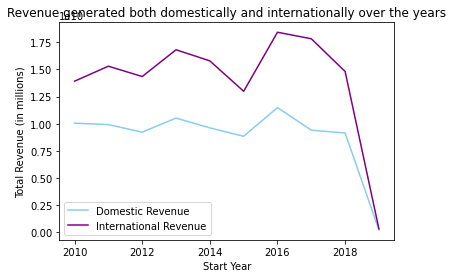

In [103]:
# Group the data by start year and calculate the sum of domestic and international revenue
grouped_df = df.groupby('start_year').agg({'domestic_gross': 'sum', 'foreign_gross': 'sum'})

# Plot the line plots for domestic and international revenue by start year with desired colors (pink and purple)
plt.plot(grouped_df.index, grouped_df['domestic_gross'], label='Domestic Revenue', color='skyblue')

plt.plot(grouped_df.index, grouped_df['foreign_gross'], label='International Revenue', color='purple')

# Add labels to the x and y axes
plt.xlabel('Start Year')
plt.ylabel('Total Revenue (in millions)')

# Add a title to the plot
plt.title('Revenue generated both domestically and internationally over the years')

# Add a legend to the plot
plt.legend()

# Show the plot
plt.show()

# Recommendation:

Based on the analysis, I have three key recommendations for the head of Microsoft's movie studio:

1..Action and Adventure:
While Action movies are a favorable option, it is also essential for Microsoft's studio to explore producing Adventure. These genres have demonstrated a high number of votes, and there is a positive correlation between the number of votes and domestic gross income. By venturing into these genres, Microsoft can tap into potentially lucrative markets and attract a broader audience.

2..Comedy:
Another viable opportunity for Microsoft's movie studio is comedy movies. Comedy movies are the third most prevalent genre in the dataset, right after Adventure movies. The advantage of comedy movies lies in their relatively lower production costs. Since documentaries do not typically require elaborate sets or fictional narratives, Microsoft can begin its movie production journey with comedy movies, gradually expanding as it gains experience and recognition.

3..Drama Movies:
Given that Drama movies constitute a significant portion of the dataset and are relatively cost-effective to produce, it would be beneficial for Microsoft's movie studio to focus on producing Drama films. Drama movies have gained popularity among various studios due to their lower production costs compared to genres like Action and Thrillers, which often involve expensive special effects and action sequences.


In summary, I recommend Microsoft's movie studio to focus on producing Action films due to their cost-effectiveness, explore Adventure and comedy genres to capitalize on high viewer engagement, and consider producing Drama movies as a starting point for its movie production venture. By combining these strategies, Microsoft can strategically position its studio for success in the dynamic and competitive film industry.


# Conclusion:

In conclusion, this project presents a significant opportunity for Microsoft to venture into the movie production industry and capitalize on the increasing demand for unique video content. Through a thorough analysis of the movie market, Microsoft can gain valuable insights to make well-informed decisions regarding the genres and styles of movies to produce. This strategic approach will pave the way for a successful and prosperous journey for their newly established movie studio.